In [187]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (20, 10)

# Assigment 3
This assigment focuses on getting comfortable with working with multidimensional data and linear regression.
Key items include:
- Creating random n-dimensional data
- Creating a Model that can handle the data
- Plot a subset of the data along with the prediction
- Using a Dataset to read in and choose certain columns to produce a model
- Create several models from various combinations of columns
- Plot a few of the results

## 1. Create a 4 dimensional data set with 64 elements and show all 4 scatter 2D plots of the data $x_1$ vs. $y$, $x_2$ vs. $y$,  $x_3$ vs. $y$, $x_4$ vs. $y$

In [446]:
n = int(64/4)
x = np.linspace(0, 1, n) + np.random.rand(4, n)
x = np.vstack([x, np.ones(len(x.T))]).T
y = np.linspace(0, 1, n) + np.random.rand(n) - 1

In [447]:
pd.DataFrame(x, y)

,0,1,2,3,4
-0.440913,0.244570,0.005403,0.281290,0.407163,1.0
-0.514138,0.418269,0.263092,0.855919,1.066581,1.0
0.096028,0.616166,0.274144,0.210308,0.799476,1.0
-0.737820,0.260726,0.806225,0.658060,0.370272,1.0
-0.603832,0.758140,0.980953,0.811179,0.325393,1.0
-0.409980,0.681304,0.357621,0.973961,0.800355,1.0
-0.074758,0.503153,1.374734,1.340003,1.128157,1.0
0.427148,1.055815,1.319453,0.535363,1.084118,1.0
0.445403,0.756377,0.772325,0.900750,1.165129,1.0
0.126219,0.812471,0.835400,0.659985,1.584452,1.0


Text(0.5, 1.0, 'Plot 1')

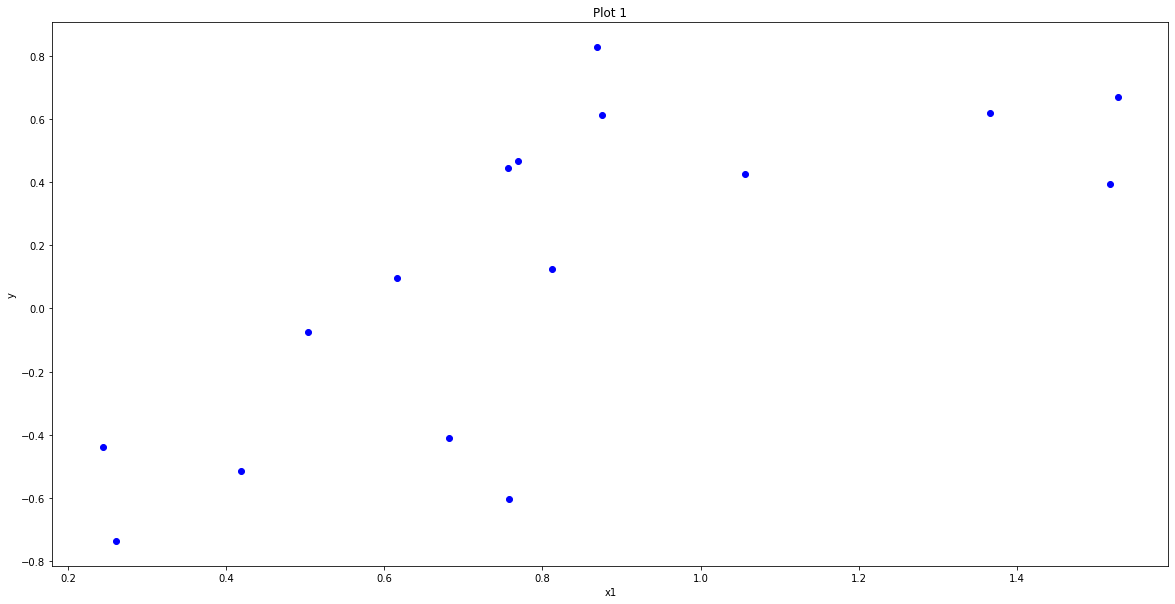

In [504]:
plt.scatter(x.T[0], y, c = "blue")
plt.xlabel("x1")
plt.ylabel("y")
plt.title("Plot 1")

Text(0.5, 1.0, 'Plot 2')

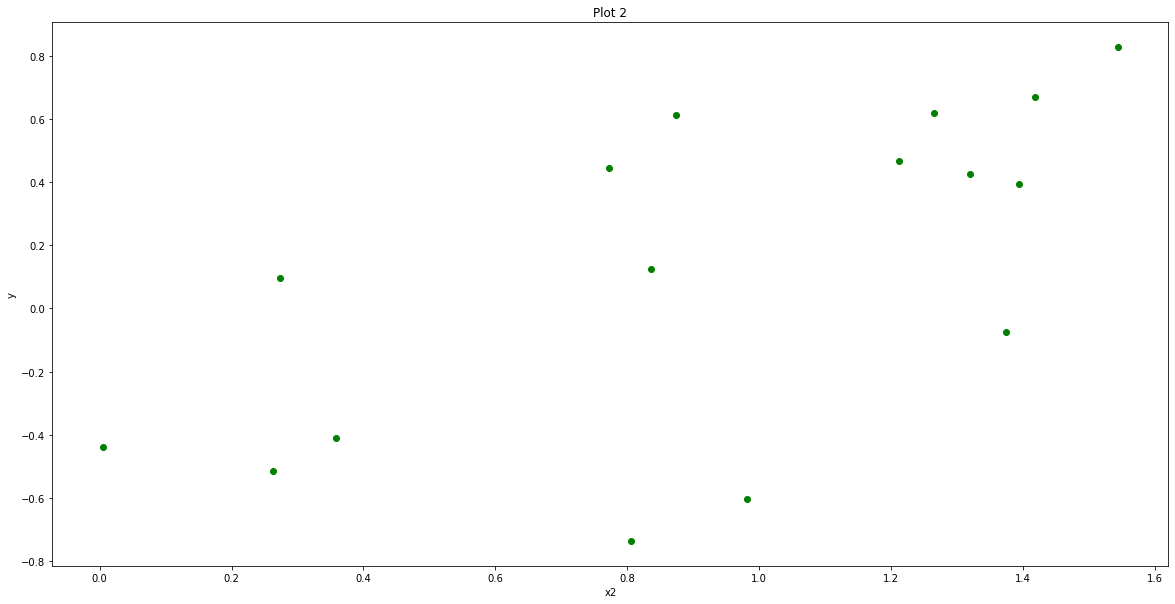

In [476]:
plt.scatter(x.T[1], y, c = "green")
plt.xlabel("x2")
plt.ylabel("y")
plt.title("Plot 2")

Text(0.5, 1.0, 'Plot 3')

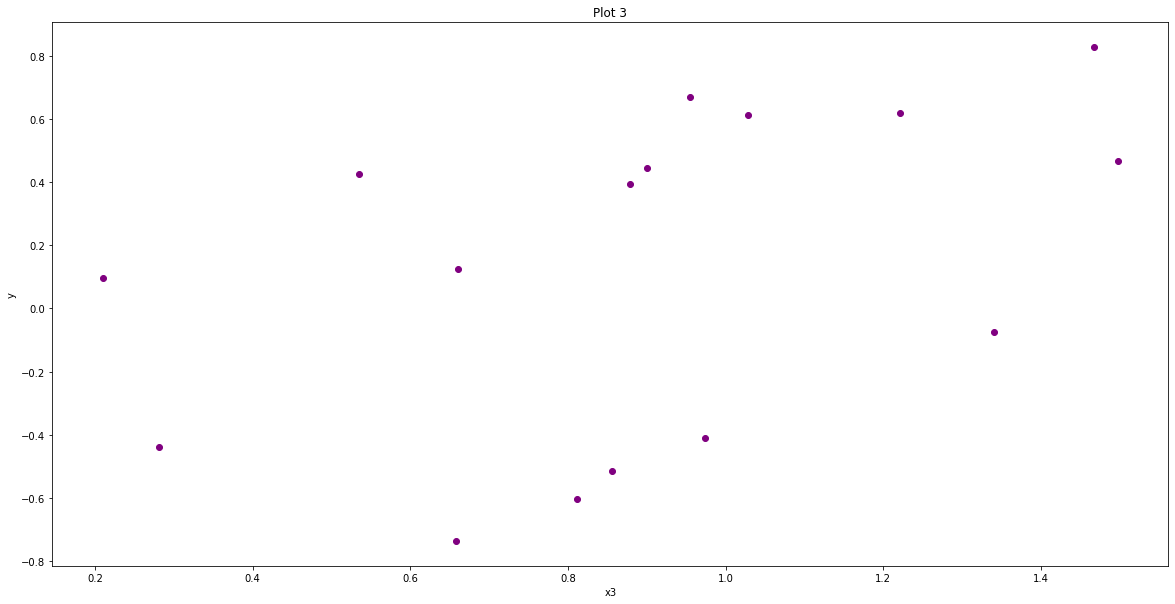

In [479]:
plt.scatter(x.T[2], y, c = "purple")
plt.xlabel("x3")
plt.ylabel("y")
plt.title("Plot 3")

Text(0.5, 1.0, 'Plot 4')

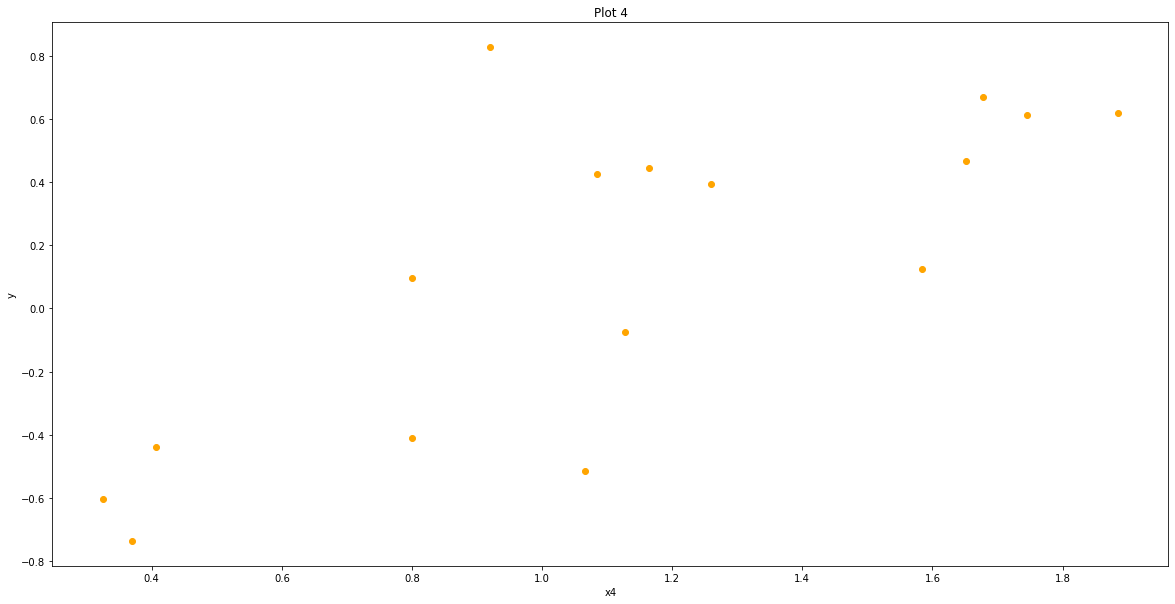

In [481]:
plt.scatter(x.T[3], y, c= "orange")
plt.xlabel("x4")
plt.ylabel("y")
plt.title("Plot 4")

## 2.  Create a Linear Regression model (like we did in class) to fit the data. *Use the example from Lesson 3 and do not use a library that calculates automatically*. We are expecting 5 coefficients to describe the linear model. 

## After creating the model (finding the coefficients), create a new column $y_p=\Sigma\beta_n\cdot x_n$ 

In [482]:
left = np.linalg.inv(np.dot(x.T, x))
right = np.dot(y.T, x)

In [483]:
beta = np.dot(left, right)
beta

array([ 0.27435259,  0.32153046, -0.0725681 ,  0.52025182, -0.91577791])

In [484]:
pred = np.dot(x, beta)

## 3. Plot the model's prediction as a different color on top of the scatter plot from Q1 in 2D for all 4 of the dimensions ($x_1 \rightarrow y_p, x_2 \rightarrow y_p, x_3 \rightarrow y_p, x_4 \rightarrow y_p$) 

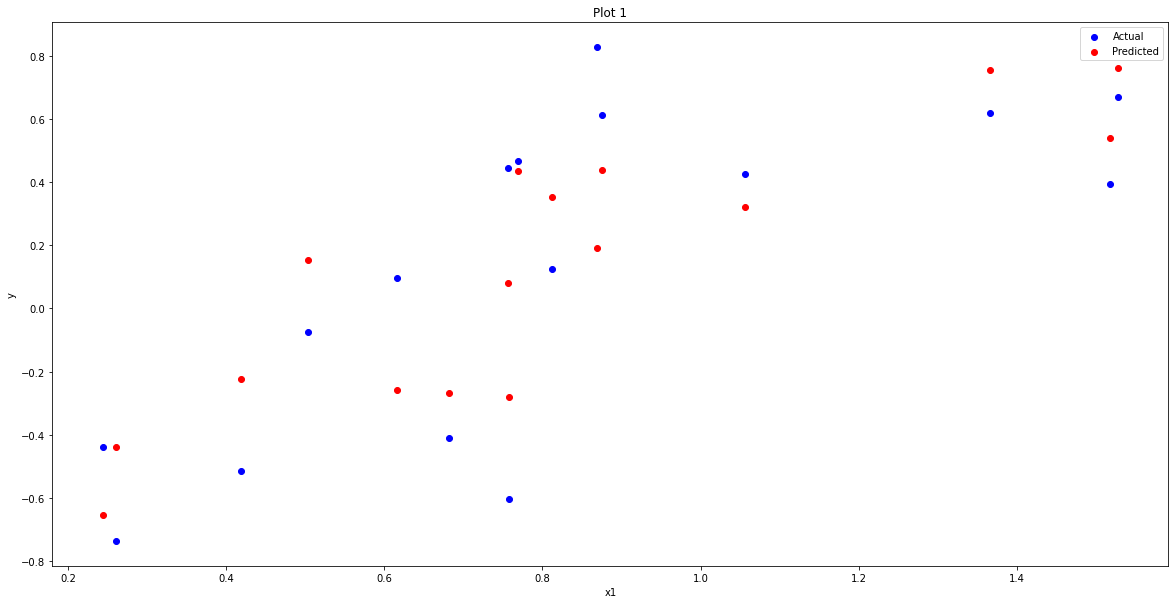

In [499]:
plt.scatter(x.T[0], y, c = "blue")
plt.scatter(x.T[0], pred, c="red")
plt.xlabel("x1")
plt.ylabel("y")
plt.title("Plot 1")
plt.legend(labels = ["Actual", "Predicted"])

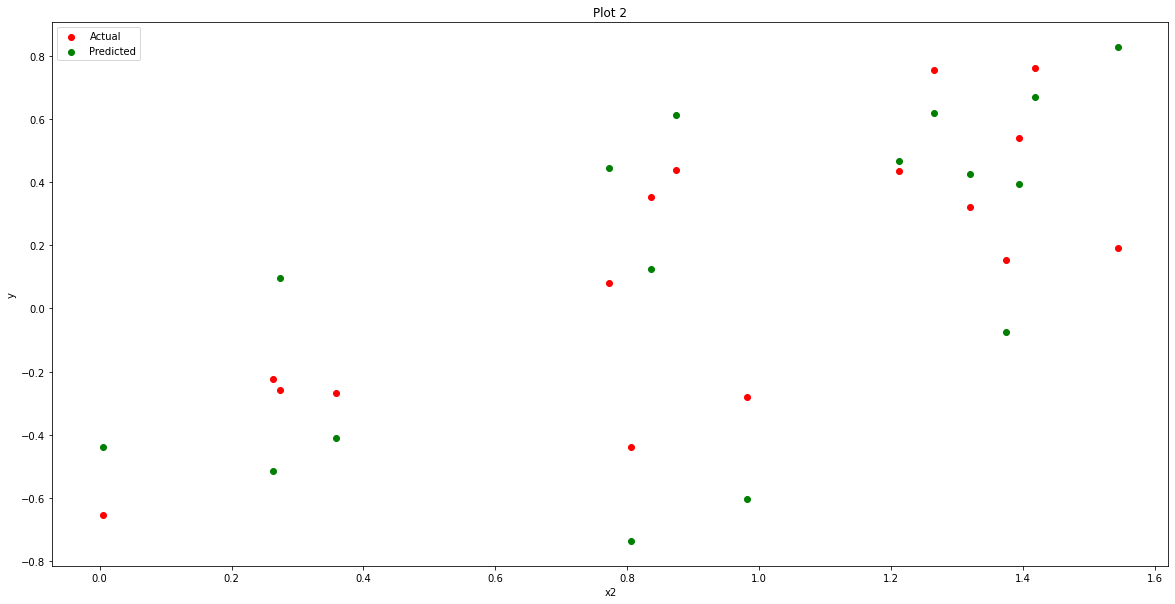

In [500]:
plt.scatter(x.T[1], pred, c="red")
plt.scatter(x.T[1], y, c="green")
plt.xlabel("x2")
plt.ylabel("y")
plt.title("Plot 2")
plt.legend(labels = ["Actual", "Predicted"])

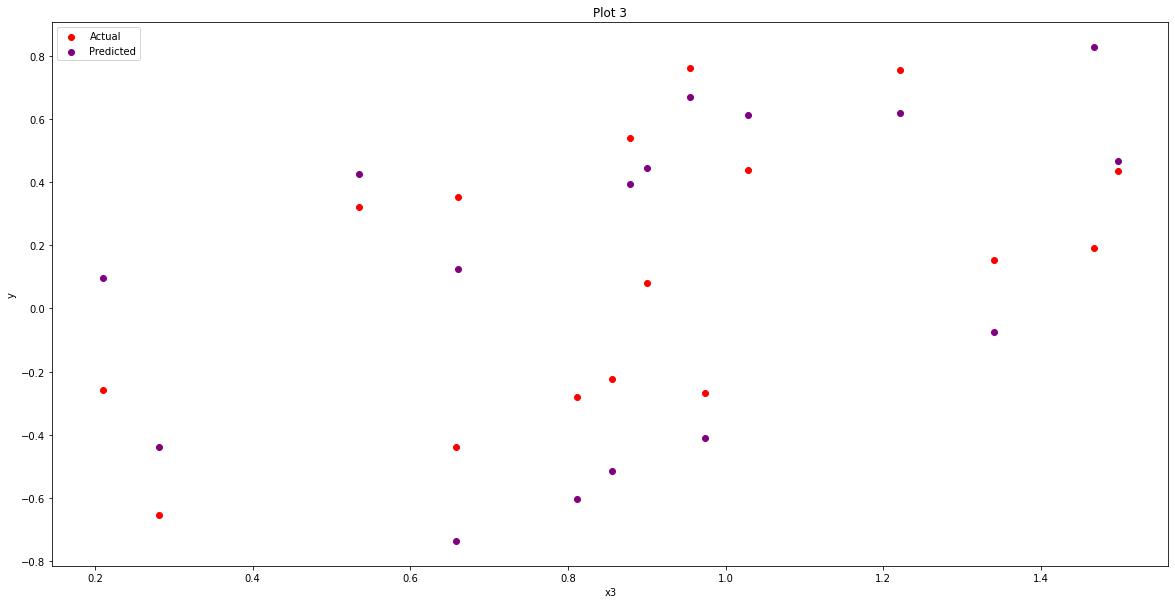

In [505]:
plt.scatter(x.T[2], pred, c="red")
plt.scatter(x.T[2], y, c="purple")
plt.xlabel("x3")
plt.ylabel("y")
plt.title("Plot 3")
plt.legend(labels = ["Actual", "Predicted"])

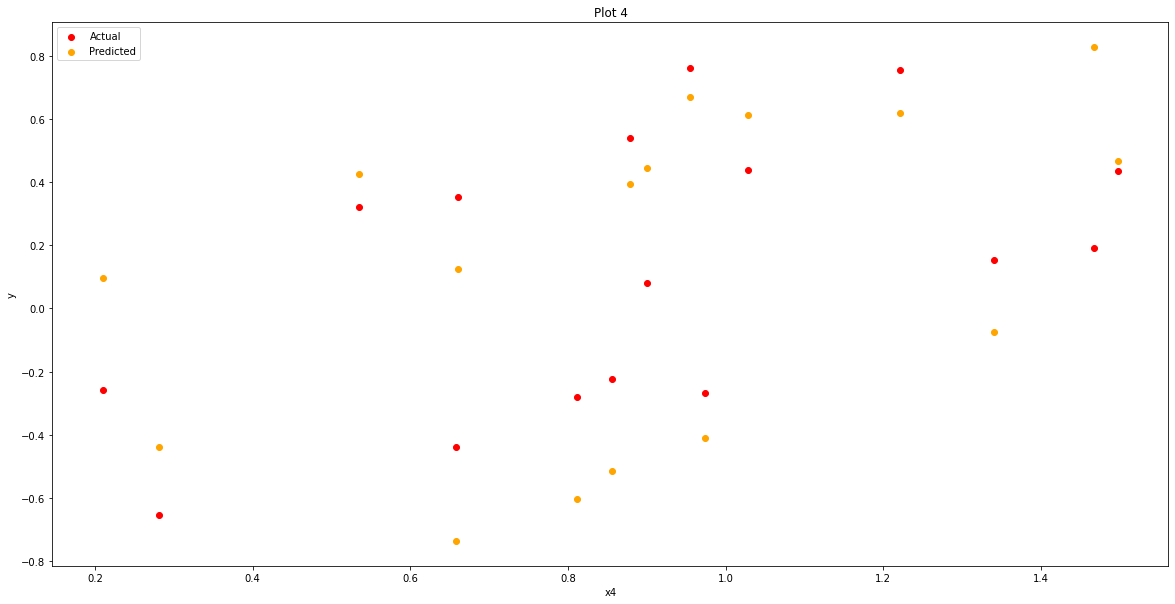

In [506]:
plt.scatter(x.T[2], pred, c="red")
plt.scatter(x.T[2], y, c="orange")
plt.xlabel("x4")
plt.ylabel("y")
plt.title("Plot 4")
plt.legend(labels = ["Actual", "Predicted"])

## 4. Read in `mlnn/data/Credit.csv` with Pandas and build a Linear Regression model to predict Credit Rating (`Rating`). Use only the numeric columns in your model, but feel free to experiment which which columns you believe are better predicters of Credit Rating (Column `Rating`)

In [548]:
import pandas as pd
import numpy as np
credit = pd.read_csv('../data/Credit.csv')
credit.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [543]:
credit.dtypes

Unnamed: 0      int64
Income        float64
Limit           int64
Rating          int64
Cards           int64
Age             int64
Education       int64
Gender         object
Student        object
Married        object
Ethnicity      object
Balance         int64
dtype: object

## Choose multiple columns as inputs beyond `Income` and `Limit` but clearly, don't use `Rating`

In [551]:
non_numeric = ["Unnamed: 0", "Gender", "Student", "Married", "Ethnicity"]
cred = credit.copy().drop(non_numeric, axis = 1)
cred.head()

,Income,Limit,Rating,Cards,Age,Education,Balance
0,14.891,3606,283,2,34,11,333
1,106.025,6645,483,3,82,15,903
2,104.593,7075,514,4,71,11,580
3,148.924,9504,681,3,36,11,964
4,55.882,4897,357,2,68,16,331


In [552]:
xC = cred.drop("Rating", axis = 1)
yC = cred["Rating"]

In [569]:
beta = np.linalg.lstsq(xC, yC, rcond=None)[0]
pred = np.dot(xC, beta)
cred["pred"] = pred
cred.head()

,Income,Limit,Rating,Cards,Age,Education,Balance,pred
0,14.891,3606,283,2,34,11,333,268.275784
1,106.025,6645,483,3,82,15,903,486.660454
2,104.593,7075,514,4,71,11,580,518.484791
3,148.924,9504,681,3,36,11,964,671.713620
4,55.882,4897,357,2,68,16,331,363.230731


In [554]:
beta

array([-1.47352977e-02,  6.79727002e-02,  5.99978634e+00,  1.19201683e-01,
        7.49574070e-01, -2.73902251e-03])

In [555]:
from sklearn.metrics import mean_squared_error
y_true = cred["Rating"]
y_pred = cred["pred"]
mean_squared_error(y_true, y_pred)

122.83382069475256

### 5. Plot your results using scatter plots (just like in class). Show as many of your columns vs. credit rating that you can.

Text(0.5, 1.0, 'Credit Rating Predicted by Income')

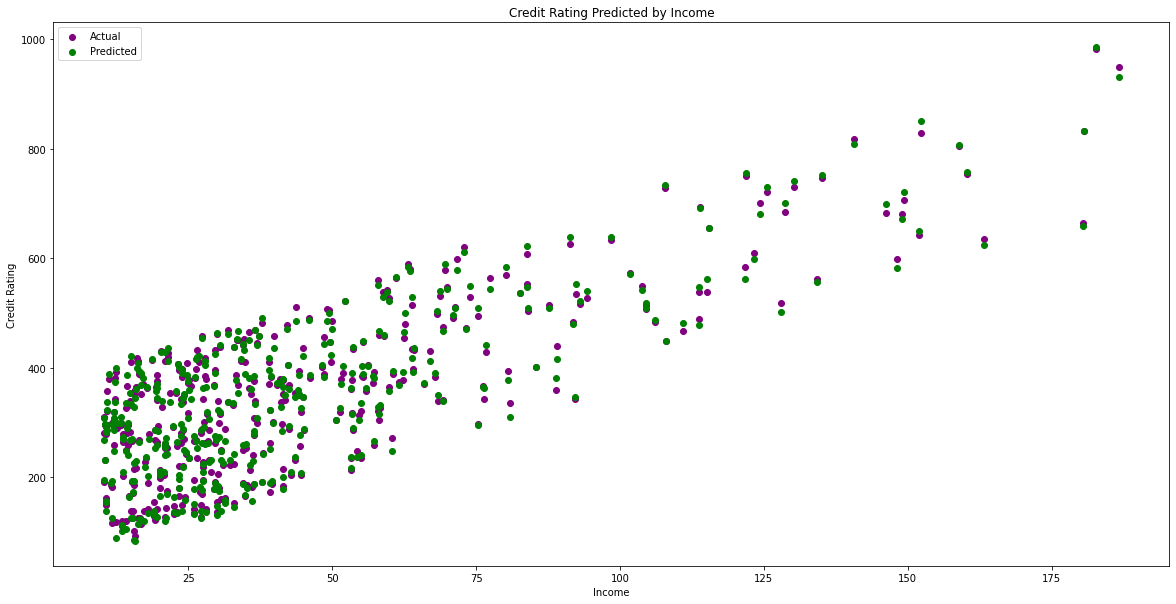

In [557]:
plt.scatter(cred["Income"], cred["Rating"], c = "purple")
plt.scatter(cred["Income"], cred["pred"], c = "green")
plt.xlabel("Income")
plt.ylabel("Credit Rating")
plt.legend(labels = ["Actual", "Predicted"])
plt.title("Credit Rating Predicted by Income")

Text(0.5, 1.0, 'Credit Rating Predicted by Limit')

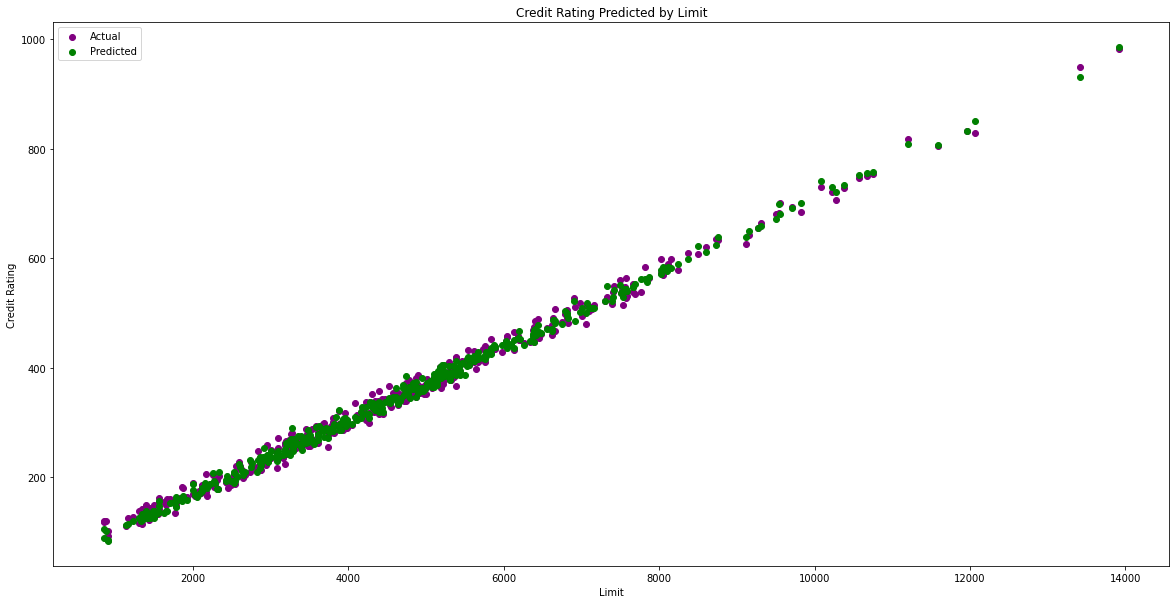

In [558]:
plt.scatter(cred["Limit"], cred["Rating"], c = "purple")
plt.scatter(cred["Limit"], cred["pred"], c = "green")
plt.xlabel("Limit")
plt.ylabel("Credit Rating")
plt.legend(labels = ["Actual", "Predicted"])
plt.title("Credit Rating Predicted by Limit")

Text(0.5, 1.0, 'Credit Rating Predicted by Age')

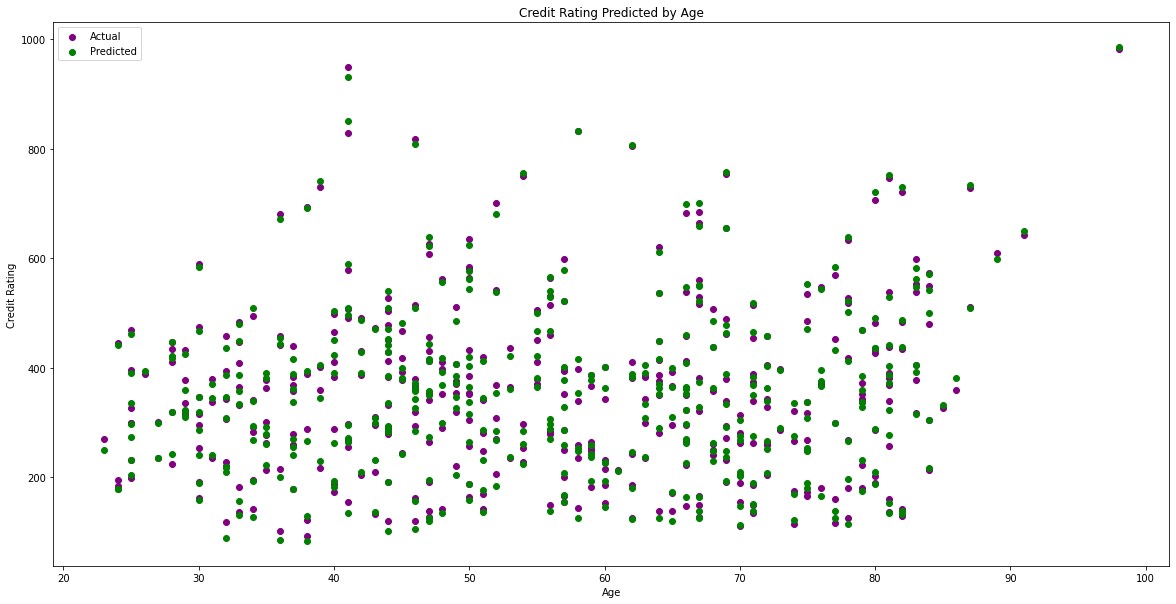

In [559]:
plt.scatter(cred["Age"], cred["Rating"], c = "purple")
plt.scatter(cred["Age"], cred["pred"], c = "green")
plt.xlabel("Age")
plt.ylabel("Credit Rating")
plt.legend(labels = ["Actual", "Predicted"])
plt.title("Credit Rating Predicted by Age")

Text(0.5, 1.0, 'Credit Rating Predicted by Balances')

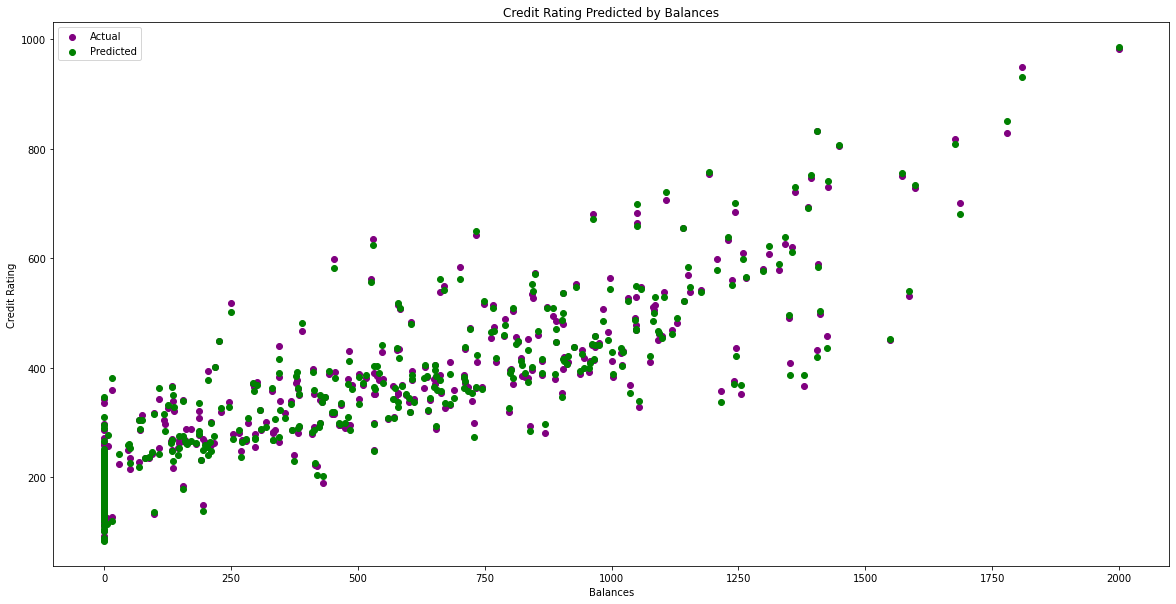

In [560]:
plt.scatter(cred["Balance"], cred["Rating"], c = "purple")
plt.scatter(cred["Balance"], cred["pred"], c = "green")
plt.xlabel("Balances")
plt.ylabel("Credit Rating")
plt.legend(labels = ["Actual", "Predicted"])
plt.title("Credit Rating Predicted by Balances")